In [78]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [79]:
data = pd.read_hdf('features_highlow.h5')

In [80]:
data.head()

,class,prest_id,conc_cf,list_comp_A,list_comp_R,list_comp_N,list_comp_D,list_comp_C,list_comp_Q,list_comp_E,...,ss8_bend,ss8_coil,acc_frac,in_gravy,out_gravy,acc_hydrophilic_in,acc_hydrophilic_out,acc_hydrophobic_in,acc_hydrophobic_out,aa_one_hot
1,0,140099,2.91540,0.111111,0.069444,0.027778,0.000000,0.027778,0.020833,0.118056,...,0.013889,0.423611,0.638889,0.378472,-0.747917,0.069444,0.291667,0.263889,0.215278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
2,0,140225,1.48770,0.066176,0.139706,0.110294,0.044118,0.058824,0.044118,0.000000,...,0.117647,0.235294,0.588235,0.360294,-0.994853,0.066176,0.323529,0.323529,0.176471,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,0,140325,1.50290,0.029197,0.029197,0.094891,0.080292,0.007299,0.043796,0.036496,...,0.021898,0.204380,0.408759,0.595620,-0.551095,0.145985,0.211679,0.408759,0.153285,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,0,140354,0.92003,0.074627,0.097015,0.000000,0.007463,0.022388,0.044776,0.171642,...,0.007463,0.388060,0.671642,0.573881,-1.178358,0.014925,0.402985,0.246269,0.186567,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10,0,140500,2.21830,0.035714,0.035714,0.042857,0.035714,0.042857,0.071429,0.085714,...,0.028571,0.607143,0.700000,0.487143,-0.905000,0.042857,0.364286,0.242857,0.178571,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."


In [81]:
data.shape

(22603, 151)

In [82]:
data_train, data_test = train_test_split(data, test_size=0.3)

In [83]:
data_train['aa_one_hot'][1].shape

(149, 20)

In [84]:
# create a 3D arrays of one one hot encodings
max_len = 149
width = 20
#training data
num_samples = data_train.shape[0]

X_train = np.zeros((num_samples, max_len, width))
for idx, aa_one_hot in enumerate(data_train['aa_one_hot'].values):
    X_train[idx, :, :] = aa_one_hot

    
y_train = data_train['class'].values

In [85]:
#testing data
num_samples = data_test.shape[0]

X_test = np.zeros((num_samples, max_len, width))
for idx, aa_one_hot in enumerate(data_test['aa_one_hot'].values):
    X_test[idx, :, :] = aa_one_hot

    
y_test = data_test['class'].values

In [86]:
# create test and train arrays of features "X2"
# list_of_features = ['frac_polar', 'ss8_ext', 'ss_ext', 'list_comp_Y',
#        'frac_uncharged_polar', 'list_comp_L', 'ss8_helix', 'ss_helix', 'in_gravy', 'frac_hydrophobic',
#        'bio_pI']

aa_features = ['list_comp_A','list_comp_R','list_comp_N',
               'list_comp_D','list_comp_C','list_comp_Q','list_comp_E','list_comp_G',
               'list_comp_H','list_comp_I','list_comp_L','list_comp_K','list_comp_M',
               'list_comp_F','list_comp_P','list_comp_S','list_comp_T','list_comp_W',
               'list_comp_Y','list_comp_V',
               # Amino acid types
               'frac_aliphatic', 'frac_uncharged_polar', 'frac_polar',
               'frac_hydrophobic', 'frac_positive', 'frac_sulfur', 'frac_negative', 'frac_amide',
               'frac_alcohol']

disorder_features = ['disembl_COILS_frac','disembl_REM465_frac','disembl_HOTLOOPS_frac','ronn_avg','ronn_frac',
                    'disopred_avg','disopred_pb_avg','disopred_frac','disopred_pb_frac']

                    
phys_features = ['aa_len',                                        
                # Physical properties
                 'bio_pI','bio_mW','bio_aromaticity','bio_instability','bio_gravy','abs_avg_charge','abs_charge',
                 'avg_charge']
                    
rna_features = ['AAA','AAC','AAT','AAG','ACA','ACC','ACT','ACG','ATA','ATC','ATT','ATG','AGA','AGC','AGT',
                'AGG','CAA','CAC','CAT','CAG','CCA','CCC','CCT','CCG','CTA','CTC','CTT','CTG','CGA','CGC',
                'CGT','CGG','TAA','TAC','TAT','TAG','TCA','TCC','TCT','TCG','TTA','TTC','TTT','TTG','TGA',
                'TGC','TGT','TGG','GAA','GAC','GAT','GAG','GCA','GCC','GCT','GCG','GTA','GTC','GTT','GTG',
                'GGA','GGC','GGT','GGG',
                'GC_content','list_nuc_A','list_nuc_C','list_nuc_G','list_nuc_T',
                'GC30',
                # SD sequences
                'sd_like_fwd','sd_like_fwd_frac','sd_like_rev','sd_like_rev_frac','sd_seq_fwd',
                'sd_seq_fwd_frac','sd_seq_rev','sd_seq_rev_frac',
                # RNA folding
                'RNA_folding_energy','RNA_40_energy','tAI']
                    
ss_features = ['acc20_mean','ss_helix', 'ss_ext', 'ss_c', 'ss8_helix', 'ss8_ext', 'ss8_turn', 'ss8_helix3',
               'ss8_pi_helix', 'ss8_bridge', 'ss8_bend', 'ss8_coil', 'acc_frac',
               'in_gravy','out_gravy', 'acc_hydrophilic_in','acc_hydrophilic_out',
               'acc_hydrophobic_in','acc_hydrophobic_out']

list_of_features = aa_features+disorder_features+phys_features+rna_features+ss_features


X2_train = data_train[list_of_features].values
X2_test = data_test[list_of_features].values


In [98]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler().fit(X2_train)
X2_train = scl.transform(X2_train)
X2_test = scl.transform(X2_test)


In [99]:
from keras.models import Sequential
from keras.layers import Dense, AlphaDropout, Flatten

batch_size = 32
epochs =  300


model = Sequential()
model.add(Dense(100, input_dim=X2_train.shape[1], activation='selu'))
model.add(AlphaDropout(0.5))
model.add(Dense(200, activation='selu'))
model.add(AlphaDropout(0.5))
model.add(Dense(100, activation='selu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss = 'binary_crossentropy', #loss=keras.losses.categorical_crossentropy, # loss = keras.losses.mean_squared_error
                  optimizer = keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
                  metrics = ['acc'])

model.fit(X2_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X2_test, y_test))

model.save('features_model.h5')

Train on 15822 samples, validate on 6781 samples
Epoch 1/300
15822/15822 [==============================] - 10s 643us/step - loss: 0.9826 - acc: 0.5078 - val_loss: 0.7065 - val_acc: 0.6365
Epoch 2/300
15822/15822 [==============================] - 8s 509us/step - loss: 0.8615 - acc: 0.5327 - val_loss: 0.7301 - val_acc: 0.6477
Epoch 3/300
15822/15822 [==============================] - 8s 498us/step - loss: 0.8217 - acc: 0.5397 - val_loss: 0.7699 - val_acc: 0.6533
Epoch 4/300
15822/15822 [==============================] - 7s 458us/step - loss: 0.7835 - acc: 0.5544 - val_loss: 0.8032 - val_acc: 0.6576
Epoch 5/300
15822/15822 [==============================] - 7s 460us/step - loss: 0.7636 - acc: 0.5650 - val_loss: 0.8540 - val_acc: 0.6570
Epoch 6/300
15822/15822 [==============================] - 7s 459us/step - loss: 0.7405 - acc: 0.5781 - val_loss: 0.8839 - val_acc: 0.6614
Epoch 7/300
15822/15822 [==============================] - 7s 472us/step - loss: 0.7210 - acc: 0.5848 - val_loss: 0.

15822/15822 [==============================] - 6s 387us/step - loss: 0.6006 - acc: 0.6750 - val_loss: 0.8771 - val_acc: 0.6764
Epoch 60/300
15822/15822 [==============================] - 6s 365us/step - loss: 0.5997 - acc: 0.6758 - val_loss: 0.8517 - val_acc: 0.6764
Epoch 61/300
15822/15822 [==============================] - 6s 394us/step - loss: 0.6008 - acc: 0.6773 - val_loss: 0.8583 - val_acc: 0.6772
Epoch 62/300
15822/15822 [==============================] - 6s 366us/step - loss: 0.5983 - acc: 0.6783 - val_loss: 0.8228 - val_acc: 0.6767
Epoch 63/300
15822/15822 [==============================] - 6s 367us/step - loss: 0.5998 - acc: 0.6793 - val_loss: 0.8941 - val_acc: 0.6772
Epoch 64/300
15822/15822 [==============================] - 6s 377us/step - loss: 0.6005 - acc: 0.6785 - val_loss: 0.8358 - val_acc: 0.6778
Epoch 65/300
15822/15822 [==============================] - 6s 371us/step - loss: 0.5977 - acc: 0.6806 - val_loss: 0.8553 - val_acc: 0.6764
Epoch 66/300
15822/15822 [=======

15822/15822 [==============================] - 4s 264us/step - loss: 0.5867 - acc: 0.6910 - val_loss: 0.8945 - val_acc: 0.6819
Epoch 118/300
15822/15822 [==============================] - 4s 255us/step - loss: 0.5882 - acc: 0.6878 - val_loss: 0.9970 - val_acc: 0.6841
Epoch 119/300
15822/15822 [==============================] - 4s 251us/step - loss: 0.5875 - acc: 0.6880 - val_loss: 1.0317 - val_acc: 0.6831
Epoch 120/300
15822/15822 [==============================] - 4s 252us/step - loss: 0.5887 - acc: 0.6935 - val_loss: 0.9894 - val_acc: 0.6823
Epoch 121/300
15822/15822 [==============================] - 4s 252us/step - loss: 0.5834 - acc: 0.6923 - val_loss: 0.9966 - val_acc: 0.6834
Epoch 122/300
15822/15822 [==============================] - 4s 251us/step - loss: 0.5883 - acc: 0.6904 - val_loss: 0.9998 - val_acc: 0.6826
Epoch 123/300
15822/15822 [==============================] - 4s 252us/step - loss: 0.5869 - acc: 0.6904 - val_loss: 0.9962 - val_acc: 0.6829
Epoch 124/300
15822/15822 [

15822/15822 [==============================] - 4s 249us/step - loss: 0.6364 - acc: 0.6679 - val_loss: 0.8300 - val_acc: 0.6878
Epoch 176/300
15822/15822 [==============================] - 4s 253us/step - loss: 0.6454 - acc: 0.6640 - val_loss: 1.9725 - val_acc: 0.6834
Epoch 177/300
15822/15822 [==============================] - 4s 251us/step - loss: 0.6597 - acc: 0.6634 - val_loss: 1.7993 - val_acc: 0.6742
Epoch 178/300
15822/15822 [==============================] - 4s 253us/step - loss: 0.6728 - acc: 0.6605 - val_loss: 1.4300 - val_acc: 0.6812
Epoch 179/300
15822/15822 [==============================] - 4s 252us/step - loss: 0.6789 - acc: 0.6556 - val_loss: 2.2173 - val_acc: 0.5054
Epoch 180/300
15822/15822 [==============================] - 4s 270us/step - loss: 0.6982 - acc: 0.6566 - val_loss: 1.5005 - val_acc: 0.6800
Epoch 181/300
15822/15822 [==============================] - 4s 255us/step - loss: 0.7156 - acc: 0.6483 - val_loss: 1.0541 - val_acc: 0.6791
Epoch 182/300
15822/15822 [

15822/15822 [==============================] - 4s 252us/step - loss: 2.8026 - acc: 0.6171 - val_loss: 2.5603 - val_acc: 0.6642
Epoch 234/300
15822/15822 [==============================] - 4s 252us/step - loss: 2.7305 - acc: 0.6252 - val_loss: 3.5968 - val_acc: 0.6484
Epoch 235/300
15822/15822 [==============================] - 4s 250us/step - loss: 2.8090 - acc: 0.6191 - val_loss: 3.4983 - val_acc: 0.6459
Epoch 236/300
15822/15822 [==============================] - 4s 252us/step - loss: 2.7108 - acc: 0.6263 - val_loss: 3.6204 - val_acc: 0.6462
Epoch 237/300
15822/15822 [==============================] - 4s 250us/step - loss: 2.7160 - acc: 0.6257 - val_loss: 3.3452 - val_acc: 0.6425
Epoch 238/300
15822/15822 [==============================] - 4s 251us/step - loss: 2.7929 - acc: 0.6167 - val_loss: 2.9971 - val_acc: 0.6487
Epoch 239/300
15822/15822 [==============================] - 4s 256us/step - loss: 2.8170 - acc: 0.6219 - val_loss: 3.2737 - val_acc: 0.6498
Epoch 240/300
15822/15822 [

15822/15822 [==============================] - 4s 249us/step - loss: 3.0625 - acc: 0.6088 - val_loss: 4.6504 - val_acc: 0.6509
Epoch 292/300
15822/15822 [==============================] - 4s 253us/step - loss: 2.9924 - acc: 0.6117 - val_loss: 6.3370 - val_acc: 0.4971
Epoch 293/300
15822/15822 [==============================] - 4s 249us/step - loss: 3.2027 - acc: 0.5944 - val_loss: 4.6944 - val_acc: 0.6481
Epoch 294/300
15822/15822 [==============================] - 4s 254us/step - loss: 3.1686 - acc: 0.6066 - val_loss: 3.9429 - val_acc: 0.4945
Epoch 295/300
15822/15822 [==============================] - 4s 254us/step - loss: 3.1053 - acc: 0.6141 - val_loss: 4.6630 - val_acc: 0.6483
Epoch 296/300
15822/15822 [==============================] - 4s 252us/step - loss: 3.1629 - acc: 0.6128 - val_loss: 4.5783 - val_acc: 0.4936
Epoch 297/300
15822/15822 [==============================] - 4s 257us/step - loss: 3.1696 - acc: 0.6112 - val_loss: 4.7736 - val_acc: 0.6509
Epoch 298/300
15822/15822 [

# Now make models based off of the one hot encodings

In [100]:
def make_model(x_train, y_train, x_test, y_test, filt_width=3, epochs=1):

    # simple model per Yoon Kim (2014)
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv1D, GlobalMaxPooling1D, AveragePooling1D
    model = Sequential()
    model.add(Conv1D(20, filt_width, activation='relu', input_shape=(149, 20)))
    #model.add(AveragePooling1D(pool_size=2, strides=None, padding='valid'))
    #model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=50, epochs=epochs,
              validation_data=(x_test, y_test), verbose=2)
    model.save('model_no_pool'+ str(filt_width) + '.h5')
    print('model saved as: ', 'model_no_pool'+ str(filt_width) + '.h5')
    return

In [101]:
epochs = 100

In [102]:
make_model(X_train, y_train, X_test, y_test, filt_width=3, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 12s - loss: 0.6896 - acc: 0.5542 - val_loss: 0.6587 - val_acc: 0.6104
Epoch 2/100
 - 9s - loss: 0.6499 - acc: 0.6221 - val_loss: 0.6507 - val_acc: 0.6169
Epoch 3/100
 - 9s - loss: 0.6406 - acc: 0.6308 - val_loss: 0.6466 - val_acc: 0.6248
Epoch 4/100
 - 9s - loss: 0.6267 - acc: 0.6492 - val_loss: 0.6463 - val_acc: 0.6257
Epoch 5/100
 - 9s - loss: 0.6224 - acc: 0.6505 - val_loss: 0.6513 - val_acc: 0.6214
Epoch 6/100
 - 9s - loss: 0.6156 - acc: 0.6621 - val_loss: 0.6492 - val_acc: 0.6152
Epoch 7/100
 - 9s - loss: 0.6117 - acc: 0.6648 - val_loss: 0.6539 - val_acc: 0.6179
Epoch 8/100
 - 10s - loss: 0.6062 - acc: 0.6648 - val_loss: 0.6494 - val_acc: 0.6183
Epoch 9/100
 - 10s - loss: 0.6063 - acc: 0.6666 - val_loss: 0.6512 - val_acc: 0.6266
Epoch 10/100
 - 9s - loss: 0.6031 - acc: 0.6693 - val_loss: 0.6469 - val_acc: 0.6251
Epoch 11/100
 - 9s - loss: 0.6013 - acc: 0.6736 - val_loss: 0.6542 - val_acc: 0.6129
Epoch 12/100
 - 9s - l

Epoch 97/100
 - 9s - loss: 0.5583 - acc: 0.7062 - val_loss: 0.6678 - val_acc: 0.6188
Epoch 98/100
 - 9s - loss: 0.5638 - acc: 0.7027 - val_loss: 0.6698 - val_acc: 0.6214
Epoch 99/100
 - 9s - loss: 0.5621 - acc: 0.7105 - val_loss: 0.6644 - val_acc: 0.6207
Epoch 100/100
 - 9s - loss: 0.5633 - acc: 0.7090 - val_loss: 0.6644 - val_acc: 0.6223
model saved as:  model_no_pool3.h5


In [103]:
make_model(X_train, y_train, X_test, y_test, filt_width=4, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 13s - loss: 0.6947 - acc: 0.5483 - val_loss: 0.6632 - val_acc: 0.6009
Epoch 2/100
 - 10s - loss: 0.6527 - acc: 0.6163 - val_loss: 0.6484 - val_acc: 0.6244
Epoch 3/100
 - 10s - loss: 0.6366 - acc: 0.6332 - val_loss: 0.6475 - val_acc: 0.6244
Epoch 4/100
 - 10s - loss: 0.6259 - acc: 0.6495 - val_loss: 0.6474 - val_acc: 0.6281
Epoch 5/100
 - 10s - loss: 0.6211 - acc: 0.6507 - val_loss: 0.6475 - val_acc: 0.6298
Epoch 6/100
 - 10s - loss: 0.6153 - acc: 0.6617 - val_loss: 0.6458 - val_acc: 0.6319
Epoch 7/100
 - 10s - loss: 0.6081 - acc: 0.6674 - val_loss: 0.6459 - val_acc: 0.6273
Epoch 8/100
 - 10s - loss: 0.6071 - acc: 0.6660 - val_loss: 0.6475 - val_acc: 0.6254
Epoch 9/100
 - 10s - loss: 0.5998 - acc: 0.6712 - val_loss: 0.6487 - val_acc: 0.6260
Epoch 10/100
 - 10s - loss: 0.5984 - acc: 0.6748 - val_loss: 0.6522 - val_acc: 0.6226
Epoch 11/100
 - 10s - loss: 0.5932 - acc: 0.6779 - val_loss: 0.6495 - val_acc: 0.6262
Epoch 12/100
 

Epoch 96/100
 - 10s - loss: 0.5386 - acc: 0.7216 - val_loss: 0.6702 - val_acc: 0.6197
Epoch 97/100
 - 10s - loss: 0.5397 - acc: 0.7284 - val_loss: 0.6661 - val_acc: 0.6200
Epoch 98/100
 - 10s - loss: 0.5373 - acc: 0.7270 - val_loss: 0.6697 - val_acc: 0.6201
Epoch 99/100
 - 10s - loss: 0.5427 - acc: 0.7190 - val_loss: 0.6696 - val_acc: 0.6207
Epoch 100/100
 - 10s - loss: 0.5416 - acc: 0.7199 - val_loss: 0.6676 - val_acc: 0.6201
model saved as:  model_no_pool4.h5


In [104]:
make_model(X_train, y_train, X_test, y_test, filt_width=5, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 14s - loss: 0.6970 - acc: 0.5484 - val_loss: 0.6600 - val_acc: 0.6055
Epoch 2/100
 - 11s - loss: 0.6484 - acc: 0.6222 - val_loss: 0.6576 - val_acc: 0.6135
Epoch 3/100
 - 11s - loss: 0.6348 - acc: 0.6394 - val_loss: 0.6514 - val_acc: 0.6189
Epoch 4/100
 - 11s - loss: 0.6300 - acc: 0.6452 - val_loss: 0.6480 - val_acc: 0.6211
Epoch 5/100
 - 11s - loss: 0.6237 - acc: 0.6527 - val_loss: 0.6485 - val_acc: 0.6220
Epoch 6/100
 - 11s - loss: 0.6146 - acc: 0.6605 - val_loss: 0.6501 - val_acc: 0.6216
Epoch 7/100
 - 11s - loss: 0.6098 - acc: 0.6663 - val_loss: 0.6510 - val_acc: 0.6238
Epoch 8/100
 - 11s - loss: 0.6069 - acc: 0.6667 - val_loss: 0.6518 - val_acc: 0.6173
Epoch 9/100
 - 11s - loss: 0.6013 - acc: 0.6739 - val_loss: 0.6495 - val_acc: 0.6198
Epoch 10/100
 - 12s - loss: 0.5950 - acc: 0.6800 - val_loss: 0.6499 - val_acc: 0.6200
Epoch 11/100
 - 12s - loss: 0.5905 - acc: 0.6816 - val_loss: 0.6491 - val_acc: 0.6191
Epoch 12/100
 

Epoch 96/100
 - 11s - loss: 0.5294 - acc: 0.7315 - val_loss: 0.6615 - val_acc: 0.6237
Epoch 97/100
 - 11s - loss: 0.5218 - acc: 0.7365 - val_loss: 0.6613 - val_acc: 0.6281
Epoch 98/100
 - 11s - loss: 0.5227 - acc: 0.7337 - val_loss: 0.6746 - val_acc: 0.6250
Epoch 99/100
 - 11s - loss: 0.5246 - acc: 0.7322 - val_loss: 0.6659 - val_acc: 0.6253
Epoch 100/100
 - 11s - loss: 0.5228 - acc: 0.7370 - val_loss: 0.6643 - val_acc: 0.6247
model saved as:  model_no_pool5.h5


In [105]:
make_model(X_train, y_train, X_test, y_test, filt_width=6, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 14s - loss: 0.6927 - acc: 0.5585 - val_loss: 0.6565 - val_acc: 0.6142
Epoch 2/100
 - 11s - loss: 0.6475 - acc: 0.6268 - val_loss: 0.6523 - val_acc: 0.6152
Epoch 3/100
 - 11s - loss: 0.6311 - acc: 0.6466 - val_loss: 0.6465 - val_acc: 0.6294
Epoch 4/100
 - 11s - loss: 0.6214 - acc: 0.6550 - val_loss: 0.6514 - val_acc: 0.6254
Epoch 5/100
 - 11s - loss: 0.6154 - acc: 0.6612 - val_loss: 0.6483 - val_acc: 0.6239
Epoch 6/100
 - 11s - loss: 0.6063 - acc: 0.6703 - val_loss: 0.6496 - val_acc: 0.6284
Epoch 7/100
 - 11s - loss: 0.6029 - acc: 0.6725 - val_loss: 0.6474 - val_acc: 0.6273
Epoch 8/100
 - 11s - loss: 0.5947 - acc: 0.6770 - val_loss: 0.6468 - val_acc: 0.6307
Epoch 9/100
 - 11s - loss: 0.5887 - acc: 0.6827 - val_loss: 0.6519 - val_acc: 0.6260
Epoch 10/100
 - 11s - loss: 0.5854 - acc: 0.6907 - val_loss: 0.6472 - val_acc: 0.6327
Epoch 11/100
 - 11s - loss: 0.5811 - acc: 0.6919 - val_loss: 0.6492 - val_acc: 0.6245
Epoch 12/100
 

Epoch 96/100
 - 11s - loss: 0.5015 - acc: 0.7479 - val_loss: 0.6647 - val_acc: 0.6399
Epoch 97/100
 - 11s - loss: 0.4992 - acc: 0.7519 - val_loss: 0.6620 - val_acc: 0.6397
Epoch 98/100
 - 11s - loss: 0.4936 - acc: 0.7533 - val_loss: 0.6724 - val_acc: 0.6430
Epoch 99/100
 - 11s - loss: 0.5000 - acc: 0.7558 - val_loss: 0.6665 - val_acc: 0.6418
Epoch 100/100
 - 11s - loss: 0.5002 - acc: 0.7510 - val_loss: 0.6691 - val_acc: 0.6377
model saved as:  model_no_pool6.h5


In [106]:
make_model(X_train, y_train, X_test, y_test, filt_width=8, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 15s - loss: 0.6889 - acc: 0.5598 - val_loss: 0.6556 - val_acc: 0.6083
Epoch 2/100
 - 12s - loss: 0.6432 - acc: 0.6304 - val_loss: 0.6474 - val_acc: 0.6232
Epoch 3/100
 - 12s - loss: 0.6258 - acc: 0.6472 - val_loss: 0.6430 - val_acc: 0.6278
Epoch 4/100
 - 12s - loss: 0.6132 - acc: 0.6610 - val_loss: 0.6430 - val_acc: 0.6272
Epoch 5/100
 - 12s - loss: 0.6021 - acc: 0.6725 - val_loss: 0.6357 - val_acc: 0.6372
Epoch 6/100
 - 12s - loss: 0.5902 - acc: 0.6813 - val_loss: 0.6353 - val_acc: 0.6360
Epoch 7/100
 - 12s - loss: 0.5831 - acc: 0.6876 - val_loss: 0.6342 - val_acc: 0.6394
Epoch 8/100
 - 12s - loss: 0.5724 - acc: 0.6957 - val_loss: 0.6367 - val_acc: 0.6421
Epoch 9/100
 - 12s - loss: 0.5659 - acc: 0.7007 - val_loss: 0.6362 - val_acc: 0.6427
Epoch 10/100
 - 12s - loss: 0.5596 - acc: 0.7065 - val_loss: 0.6370 - val_acc: 0.6428
Epoch 11/100
 - 12s - loss: 0.5524 - acc: 0.7129 - val_loss: 0.6420 - val_acc: 0.6352
Epoch 12/100
 

Epoch 96/100
 - 12s - loss: 0.4681 - acc: 0.7720 - val_loss: 0.6853 - val_acc: 0.6394
Epoch 97/100
 - 12s - loss: 0.4735 - acc: 0.7630 - val_loss: 0.6768 - val_acc: 0.6414
Epoch 98/100
 - 12s - loss: 0.4661 - acc: 0.7715 - val_loss: 0.6737 - val_acc: 0.6390
Epoch 99/100
 - 12s - loss: 0.4705 - acc: 0.7678 - val_loss: 0.6790 - val_acc: 0.6453
Epoch 100/100
 - 12s - loss: 0.4675 - acc: 0.7728 - val_loss: 0.6746 - val_acc: 0.6368
model saved as:  model_no_pool8.h5


In [107]:
make_model(X_train, y_train, X_test, y_test, filt_width=10, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 16s - loss: 0.6833 - acc: 0.5617 - val_loss: 0.6545 - val_acc: 0.6089
Epoch 2/100
 - 13s - loss: 0.6373 - acc: 0.6393 - val_loss: 0.6408 - val_acc: 0.6287
Epoch 3/100
 - 13s - loss: 0.6184 - acc: 0.6572 - val_loss: 0.6382 - val_acc: 0.6315
Epoch 4/100
 - 14s - loss: 0.6012 - acc: 0.6739 - val_loss: 0.6288 - val_acc: 0.6436
Epoch 5/100
 - 14s - loss: 0.5875 - acc: 0.6849 - val_loss: 0.6244 - val_acc: 0.6518
Epoch 6/100
 - 13s - loss: 0.5725 - acc: 0.6940 - val_loss: 0.6209 - val_acc: 0.6539
Epoch 7/100
 - 13s - loss: 0.5606 - acc: 0.7064 - val_loss: 0.6197 - val_acc: 0.6531
Epoch 8/100
 - 13s - loss: 0.5518 - acc: 0.7122 - val_loss: 0.6240 - val_acc: 0.6512
Epoch 9/100
 - 14s - loss: 0.5447 - acc: 0.7159 - val_loss: 0.6255 - val_acc: 0.6483
Epoch 10/100
 - 14s - loss: 0.5417 - acc: 0.7204 - val_loss: 0.6253 - val_acc: 0.6495
Epoch 11/100
 - 13s - loss: 0.5352 - acc: 0.7217 - val_loss: 0.6302 - val_acc: 0.6509
Epoch 12/100
 

Epoch 96/100
 - 13s - loss: 0.4385 - acc: 0.7860 - val_loss: 0.6843 - val_acc: 0.6471
Epoch 97/100
 - 13s - loss: 0.4445 - acc: 0.7861 - val_loss: 0.6702 - val_acc: 0.6472
Epoch 98/100
 - 13s - loss: 0.4418 - acc: 0.7912 - val_loss: 0.6909 - val_acc: 0.6503
Epoch 99/100
 - 13s - loss: 0.4411 - acc: 0.7873 - val_loss: 0.6763 - val_acc: 0.6440
Epoch 100/100
 - 13s - loss: 0.4440 - acc: 0.7886 - val_loss: 0.6608 - val_acc: 0.6430
model saved as:  model_no_pool10.h5


In [108]:
make_model(X_train, y_train, X_test, y_test, filt_width=12, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 17s - loss: 0.6810 - acc: 0.5693 - val_loss: 0.6491 - val_acc: 0.6160
Epoch 2/100
 - 15s - loss: 0.6359 - acc: 0.6379 - val_loss: 0.6542 - val_acc: 0.6082
Epoch 3/100
 - 15s - loss: 0.6139 - acc: 0.6641 - val_loss: 0.6321 - val_acc: 0.6450
Epoch 4/100
 - 15s - loss: 0.5964 - acc: 0.6799 - val_loss: 0.6260 - val_acc: 0.6503
Epoch 5/100
 - 15s - loss: 0.5792 - acc: 0.6909 - val_loss: 0.6235 - val_acc: 0.6555
Epoch 6/100
 - 15s - loss: 0.5600 - acc: 0.7077 - val_loss: 0.6202 - val_acc: 0.6523
Epoch 7/100
 - 15s - loss: 0.5496 - acc: 0.7163 - val_loss: 0.6135 - val_acc: 0.6579
Epoch 8/100
 - 15s - loss: 0.5380 - acc: 0.7215 - val_loss: 0.6183 - val_acc: 0.6555
Epoch 9/100
 - 15s - loss: 0.5290 - acc: 0.7282 - val_loss: 0.6182 - val_acc: 0.6592
Epoch 10/100
 - 15s - loss: 0.5216 - acc: 0.7340 - val_loss: 0.6189 - val_acc: 0.6595
Epoch 11/100
 - 15s - loss: 0.5126 - acc: 0.7400 - val_loss: 0.6201 - val_acc: 0.6617
Epoch 12/100
 

Epoch 96/100
 - 14s - loss: 0.4119 - acc: 0.8061 - val_loss: 0.6717 - val_acc: 0.6545
Epoch 97/100
 - 15s - loss: 0.4099 - acc: 0.8101 - val_loss: 0.6786 - val_acc: 0.6548
Epoch 98/100
 - 14s - loss: 0.4193 - acc: 0.8063 - val_loss: 0.6714 - val_acc: 0.6567
Epoch 99/100
 - 14s - loss: 0.4125 - acc: 0.8030 - val_loss: 0.6846 - val_acc: 0.6555
Epoch 100/100
 - 14s - loss: 0.4136 - acc: 0.8039 - val_loss: 0.6785 - val_acc: 0.6557
model saved as:  model_no_pool12.h5


## Make an ensemble with these models

In [109]:
#load all the models
import keras
model_no_pool3 = keras.models.load_model('model_no_pool3.h5')
model_no_pool4 = keras.models.load_model('model_no_pool4.h5')
model_no_pool5 = keras.models.load_model('model_no_pool5.h5')
model_no_pool6 = keras.models.load_model('model_no_pool6.h5')
model_no_pool8 = keras.models.load_model('model_no_pool8.h5')
model_no_pool10 = keras.models.load_model('model_no_pool10.h5')
model_no_pool12 = keras.models.load_model('model_no_pool12.h5')


In [110]:
x = X_train
y = y_train

y_pred3 = model_no_pool3.predict(x)
y_pred4 = model_no_pool4.predict(x)
y_pred5 = model_no_pool5.predict(x)
y_pred6 = model_no_pool6.predict(x)
y_pred8 = model_no_pool8.predict(x)
y_pred10 = model_no_pool10.predict(x)
y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round((y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred8 + y_pred10 + y_pred12)/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Train acc')
np.sum(z)/len(z)

Train acc


0.88832006067500946

In [111]:
x = X_train
y = y_train


y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round(y_pred12)

z = y_pred_total == np.reshape(y, [-1,1])

print('Train acc')
np.sum(z)/len(z)

Train acc


0.9002654531664771

In [112]:
x = X_test
y = y_test

y_pred3 = model_no_pool3.predict(x)
y_pred4 = model_no_pool4.predict(x)
y_pred5 = model_no_pool5.predict(x)
y_pred6 = model_no_pool6.predict(x)
y_pred8 = model_no_pool8.predict(x)
y_pred10 = model_no_pool10.predict(x)
y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round((y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred8 + y_pred10 + y_pred12)/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Test acc')
np.sum(z)/len(z)

Test acc


0.66774811974635007

In [113]:
x = X_test
y = y_test


y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round(y_pred12)

z = y_pred_total == np.reshape(y, [-1,1])

print('Test acc')
np.sum(z)/len(z)

Test acc


0.65565550803716266

# Combine feature model and AA model

In [115]:
model_features = keras.models.load_model('features_model.h5')

y_pred_feat = model_features.predict(X2_test)

x = X_test
y = y_test

y_pred3 = model_no_pool3.predict(x)
y_pred4 = model_no_pool4.predict(x)
y_pred5 = model_no_pool5.predict(x)
y_pred6 = model_no_pool6.predict(x)
y_pred8 = model_no_pool8.predict(x)
y_pred10 = model_no_pool10.predict(x)
y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round(((y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred8 + y_pred10 + y_pred12)/7 + y_pred_feat)/2)

z = y_pred_total == np.reshape(y, [-1,1])

print('Test acc')
np.sum(z)/len(z)


Test acc


0.6518212653001032

## Looks like adding a model based on the calculated features doesn't help the prediction.  Should focus on parameter tuning.  

# Filter Vizualization

In [119]:
#try to vizulaize the filters
weights = model_no_pool8.get_weights()

In [120]:
weights[0].shape

(8, 20, 20)

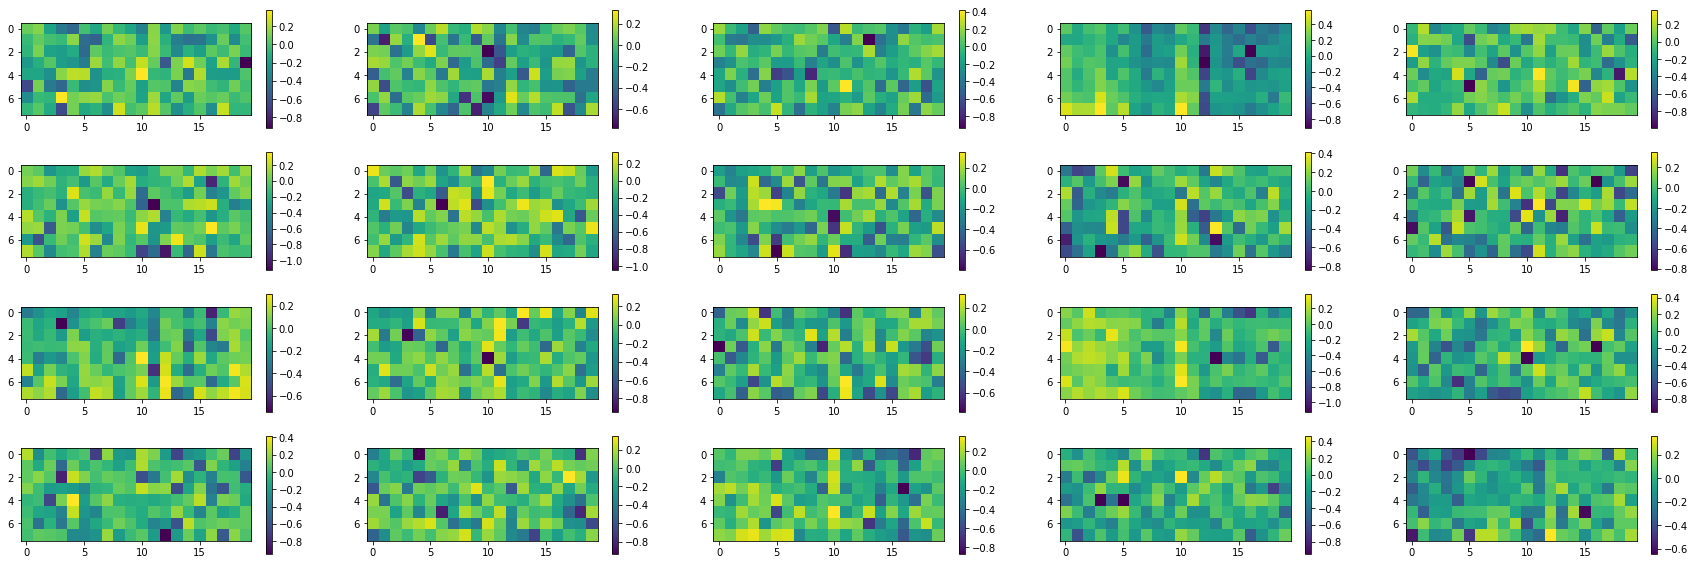

In [121]:
#I'm expecting 10 filters that are 8 x 20
#if I'm interpreting this correctly the weights[0] is and array [8x20 filter, 10 filters]

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,10))
for ind in range(1,21):
    w = weights[0][:,:,ind-1]
    plt.subplot(4,5,ind)
    plt.imshow(w)
    plt.colorbar()

since the data only has a single hot pixel in each row, I would expect to see similar patterns in the filters, but this doesn't look much like that so maybe there is some more work to be done here or my expecation is wrong.